<a href="https://colab.research.google.com/github/brialln/Air-Data-Quality-Analysis-Using-R/blob/main/Air_Quality_Analysis_Basic_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this in a Python cell to set up R in Google Colab
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314949 sha256=c71c3763e3a115a764ede2336e9eca9971d05e8a87d8c1450dcc576961964340
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
# Load the R magic
%load_ext rpy2.ipython

Rows: 216 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Combined Wind Direction
dbl  (7): PM2.5 Concentration, Dew Point, Temperature, Pressure, Combined Wi...
dttm (1): DateTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
[1] "DateTime"                "PM2.5 Concentration"    
[3] "Dew Point"               "Temperature"            
[5] "Pressure"                "Combined Wind Direction"
[7] "Combined Wind Speed"     "Cumulated Hours of Snow"
[9] "Cumulated Hours of Rain"


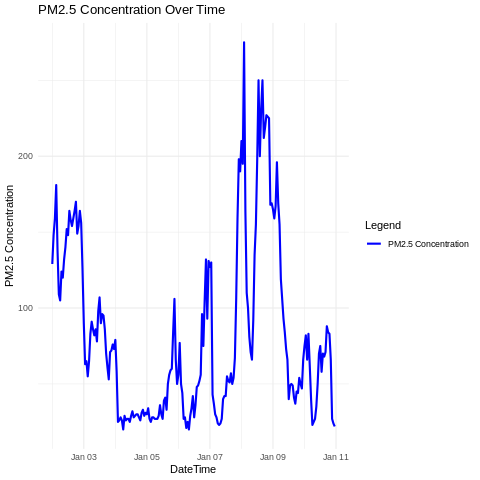

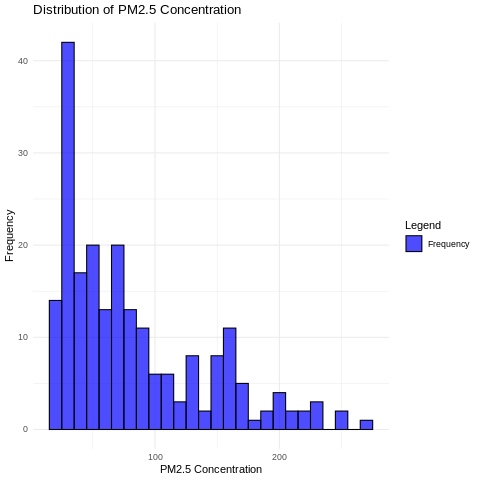

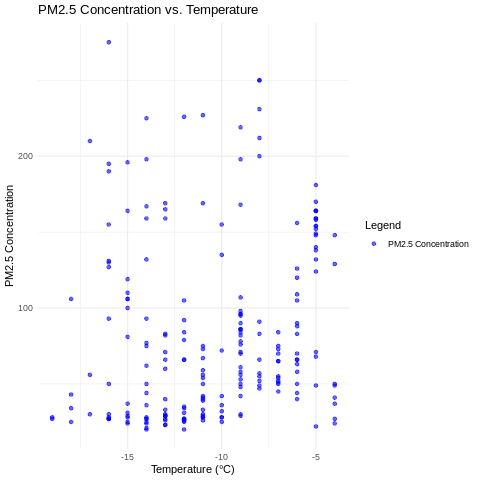

In [ ]:
%%R
# Install necessary packages if not already installed
if (!require(ggplot2)) install.packages("ggplot2", repos = "http://cran.us.r-project.org")
if (!require(readr)) install.packages("readr", repos = "http://cran.us.r-project.org")

# Load the required libraries
library(readr)
library(ggplot2)

# Load the CSV file
file_path <- "/content/R Language_ Project 3 - Air Quality Data - Air Quality in US embassy in Beijing, China.csv"
data <- read_csv(file_path)

# Correctly parse the DateTime column
data$DateTime <- as.POSIXct(data$DateTime, format = "%Y-%m-%dT%H:%M:%OS", tz = "UTC")

# Check column names
print(names(data))

# 1. Line chart for pollutant trends over time
line_chart <- ggplot(data, aes(x = DateTime, y = `PM2.5 Concentration`, color = "PM2.5 Concentration")) +
  geom_line(size = 1) +
  scale_color_manual(values = c("PM2.5 Concentration" = "blue")) +
  labs(
    title = "PM2.5 Concentration Over Time",
    x = "DateTime",
    y = "PM2.5 Concentration",
    color = "Legend"
  ) +
  theme_minimal()

# Save the line chart
ggsave("/content/sample_data/line_chart.png", line_chart, width = 10, height = 6)

print(line_chart)

# 2. Histogram for pollutant concentration distribution
histogram <- ggplot(data, aes(x = `PM2.5 Concentration`, fill = "Frequency")) +
  geom_histogram(binwidth = 10, color = "black", alpha = 0.7) +
  scale_fill_manual(values = c("Frequency" = "blue")) +
  labs(
    title = "Distribution of PM2.5 Concentration",
    x = "PM2.5 Concentration",
    y = "Frequency",
    fill = "Legend"
  ) +
  theme_minimal()

# Save the histogram
ggsave("/content/sample_data/histogram.png", histogram, width = 10, height = 6)

print(histogram)

# 3. Scatter plot for pollutant levels vs. weather conditions (example: Temperature vs PM2.5)
scatter_plot <- ggplot(data, aes(x = Temperature, y = `PM2.5 Concentration`, color = "PM2.5 Concentration")) +
  geom_point(alpha = 0.6) +
  scale_color_manual(values = c("PM2.5 Concentration" = "blue")) +
  labs(
    title = "PM2.5 Concentration vs. Temperature",
    x = "Temperature (°C)",
    y = "PM2.5 Concentration",
    color = "Legend"
  ) +
  theme_minimal()

# Save the scatter plot
ggsave("/content/sample_data/scatter_plot.png", scatter_plot, width = 10, height = 6)

print(scatter_plot)
